In [1]:
#dependency install
!pip install ultralytics torch torchvision torchaudio matplotlib opencv-python tqdm datasets


INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.5 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.5 MB 363.9 kB/s eta 0:00:06
   -------- ------------------------------- 0.5/2.5 MB 363.9 kB/s eta 0:00:06
   ----


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#import libraries
import os
import torch
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from datasets import load_dataset
from datasets.utils.logging import set_verbosity_info


c:\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Cuda availability checkup

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print(" Using CPU.")
    
    
    

Using device: cuda
GPU: NVIDIA GeForce RTX 4050 Laptop GPU


In [4]:
#loading the parking space data from Hugging face
set_verbosity_info()
dataset = load_dataset("backseollgi/parking_dataset", "carpk", streaming=True)


print(dataset)

IterableDatasetDict({
    train: IterableDataset({
        features: ['image', 'bboxes', 'labels'],
        num_shards: 3
    })
    test: IterableDataset({
        features: ['image', 'bboxes', 'labels'],
        num_shards: 2
    })
})


dict_keys(['image', 'bboxes', 'labels'])


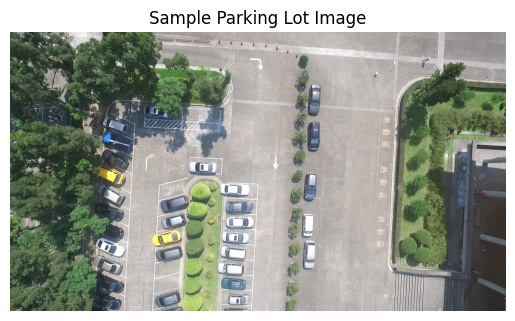

In [6]:
# Get the first sample from streaming dataset
sample = next(iter(dataset["train"]))
print(sample.keys()) 

plt.imshow(sample["image"])
plt.title("Sample Parking Lot Image")
plt.axis('off')
plt.show()